# EDA 2번

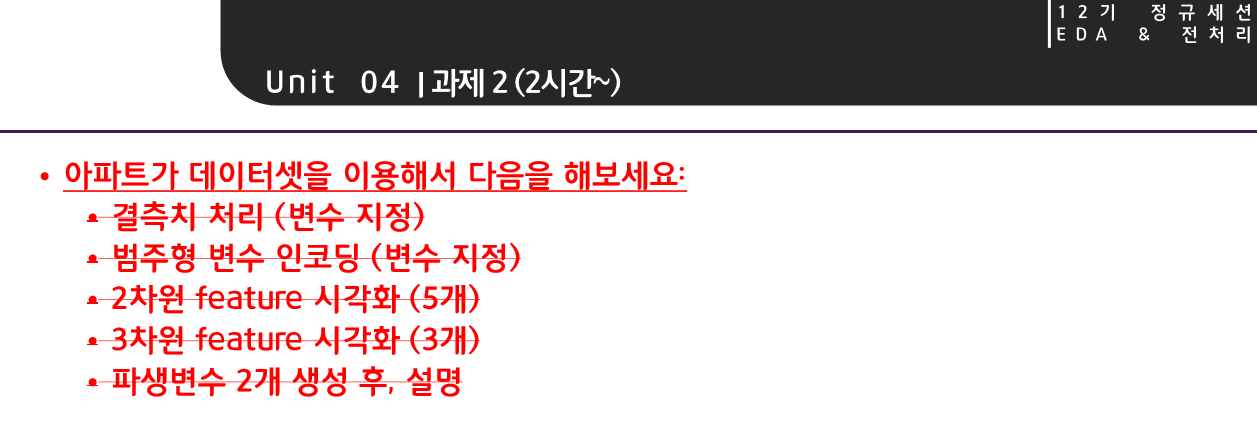

#### 개요
아파트 경매 데이터로 EDA를 해보는 것이었다. 강의자님의 강조사항에 집중해서 공부했다.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('../data/Auction_master_train.csv')
data.head(5)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [4]:
column_li = data.columns.values
print(column_li)
print(len(column_li))

['Auction_key' 'Auction_class' 'Bid_class' 'Claim_price'
 'Appraisal_company' 'Appraisal_date' 'Auction_count'
 'Auction_miscarriage_count' 'Total_land_gross_area'
 'Total_land_real_area' 'Total_land_auction_area' 'Total_building_area'
 'Total_building_auction_area' 'Total_appraisal_price'
 'Minimum_sales_price' 'First_auction_date' 'Final_auction_date'
 'Final_result' 'Creditor' 'addr_do' 'addr_si' 'addr_dong' 'addr_li'
 'addr_san' 'addr_bunji1' 'addr_bunji2' 'addr_etc' 'Apartment_usage'
 'Preserve_regist_date' 'Total_floor' 'Current_floor' 'Specific'
 'Share_auction_YorN' 'road_name' 'road_bunji1' 'road_bunji2' 'Close_date'
 'Close_result' 'point.y' 'point.x' 'Hammer_price']
41


* 41개의 feature를 가진 dataframe

In [5]:
print(data.isnull().sum())
print(data.dtypes)

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

* addr_li - 주소_리 
* addr_bunji1 - 주소_번지1
* addr_bunji1 - 주소_번지2
* Specific - 기타_특이사항
* road_bunji1 - 도로명주소_번지1
* road_bunji2 - 도로명주소_번지2 

Specific과 addr_li 결측치 조정을 하겠습니다.
Nan값을 string형의 Null로 바꿔주었습니다.

In [6]:
data['Specific'].fillna('Null', inplace=True)
data['addr_li'].fillna('Null', inplace=True)

In [7]:
# object형 자료들만 
obj_data = data.select_dtypes(include=['object'])
obj_data.head()

,Auction_class,Bid_class,Appraisal_company,Appraisal_date,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,...,addr_li,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Specific,Share_auction_YorN,road_name,Close_date,Close_result
0,임의,개별,정명감정,2017-07-26 00:00:00,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,...,Null,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,Null,N,해운대해변로,2018-06-14 00:00:00,배당
1,임의,일반,희감정,2016-09-12 00:00:00,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,...,Null,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,Null,N,마린시티2로,2017-03-30 00:00:00,배당
2,임의,개별,혜림감정,2016-11-22 00:00:00,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,...,Null,N,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,Null,N,모라로110번길,2017-12-13 00:00:00,배당
3,임의,일반,신라감정,2016-12-13 00:00:00,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,...,Null,N,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,Null,N,황령대로319번가길,2017-12-27 00:00:00,배당
4,강제,일반,나라감정,2016-03-07 00:00:00,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,...,Null,N,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,Null,N,오작로,2016-10-04 00:00:00,배당


In [8]:
print('범주형 변수들')
li = []
for i in obj_data.columns.values:
    sort = sorted(set(obj_data[i]))
    if len(sort) < 20:
        li.append([i,sort])
li.pop()
li.pop(2)

col = ([row[0] for row in li])
print(li)
obj_data = obj_data[col]
obj_data.head()

범주형 변수들
[['Auction_class', ['강제', '임의']], ['Bid_class', ['개별', '일괄', '일반']], ['addr_do', ['부산', '서울']], ['addr_li', ['Null', '교리', '대라리', '동부리', '매학리', '명례리', '모전리', '삼성리', '서부리', '용수리']], ['addr_san', ['N', 'Y']], ['Apartment_usage', ['아파트', '주상복합']], ['Share_auction_YorN', ['N', 'Y']]]


,Auction_class,Bid_class,addr_do,addr_li,addr_san,Apartment_usage,Share_auction_YorN
0,임의,개별,부산,Null,N,주상복합,N
1,임의,일반,부산,Null,N,아파트,N
2,임의,개별,부산,Null,N,아파트,N
3,임의,일반,부산,Null,N,아파트,N
4,강제,일반,부산,Null,N,아파트,N


* 분석하기 용이해 보이는 7가지 명목형 변수들이 보입니다. 이들만 모아놓은 데이터프레임을 만들었습니다.
* 각 변수들을 원핫으로 인코딩하겠습니다.

In [9]:
#더미 만들기
dummy = pd.get_dummies(data[col])
dummy.head()


,Auction_class_강제,Auction_class_임의,Bid_class_개별,Bid_class_일괄,Bid_class_일반,addr_do_부산,addr_do_서울,addr_li_Null,addr_li_교리,addr_li_대라리,...,addr_li_모전리,addr_li_삼성리,addr_li_서부리,addr_li_용수리,addr_san_N,addr_san_Y,Apartment_usage_아파트,Apartment_usage_주상복합,Share_auction_YorN_N,Share_auction_YorN_Y
0,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
3,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
4,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [10]:
# 기존의 범주형 변수 버리고 새로운 인코딩 된 변수 취하기
new_df = data.drop(col, axis=1)
new_df = pd.concat([new_df,dummy], axis=1).head()
new_df.head()

,Auction_key,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,addr_li_모전리,addr_li_삼성리,addr_li_서부리,addr_li_용수리,addr_san_N,addr_san_Y,Apartment_usage_아파트,Apartment_usage_주상복합,Share_auction_YorN_N,Share_auction_YorN_Y
0,2687,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,...,0,0,0,0,1,0,0,1,1,0
1,2577,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,...,0,0,0,0,1,0,1,0,1,0
2,2197,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,...,0,0,0,0,1,0,1,0,1,0
3,2642,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,...,0,0,0,0,1,0,1,0,1,0
4,1958,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,...,0,0,0,0,1,0,1,0,1,0


In [11]:
num_data = data.select_dtypes(['int64','float'])
print(num_data.dtypes)
num_data.head()

Auction_key                      int64
Claim_price                      int64
Auction_count                    int64
Auction_miscarriage_count        int64
Total_land_gross_area          float64
Total_land_real_area           float64
Total_land_auction_area        float64
Total_building_area            float64
Total_building_auction_area    float64
Total_appraisal_price            int64
Minimum_sales_price              int64
addr_bunji1                    float64
addr_bunji2                    float64
Total_floor                      int64
Current_floor                    int64
road_bunji1                    float64
road_bunji2                    float64
point.y                        float64
point.x                        float64
Hammer_price                     int64
dtype: object


,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
0,2687,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,1398.0,NaN,45,5,30.0,NaN,35.162717,129.137048,760000000
1,2577,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,1407.0,NaN,70,51,33.0,NaN,35.156633,129.145068,971889999
2,2197,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,552.0,NaN,15,14,88.0,NaN,35.184601,128.996765,93399999
3,2642,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,243.0,23.0,20,11,110.0,NaN,35.154180,129.089081,256899000
4,1958,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,399.0,2.0,7,7,51.0,NaN,35.099630,128.998874,158660000


In [11]:
num_data.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


* 아직 범주형 데이터가 보입니다. 이들을 삭제하겠습니다.

In [12]:
del_li = ['Auction_key', 'addr_bunji1', 'addr_bunji2', 'road_bunji1', 'road_bunji2']
num_data = num_data.drop(del_li, axis=1)
num_data.head()

,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,point.y,point.x,Hammer_price
0,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,45,5,35.162717,129.137048,760000000
1,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,70,51,35.156633,129.145068,971889999
2,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,15,14,35.184601,128.996765,93399999
3,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,20,11,35.154180,129.089081,256899000
4,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,7,7,35.099630,128.998874,158660000


In [13]:
numerical_features = list(num_data.columns)
num_data[numerical_features].corr()

,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,point.y,point.x,Hammer_price
Claim_price,1.000000,0.013312,0.015411,0.003771,0.180421,0.182207,0.202379,0.204000,0.248846,0.261076,0.016466,0.043258,0.095939,-0.103605,0.267728
Auction_count,0.013312,1.000000,0.972918,-0.045697,0.062824,0.062868,0.107074,0.104286,0.071038,-0.036716,-0.052329,-0.029124,-0.054074,0.051634,-0.016999
Auction_miscarriage_count,0.015411,0.972918,1.000000,-0.050457,0.069582,0.069392,0.118290,0.114779,0.077547,-0.033039,-0.045343,-0.021852,-0.057197,0.054032,-0.011296
Total_land_gross_area,0.003771,-0.045697,-0.050457,1.000000,0.049791,0.048225,0.017401,0.016474,0.041896,0.067135,0.100557,0.094385,0.014971,-0.014285,0.070466
Total_land_real_area,0.180421,0.062824,0.069582,0.049791,1.000000,0.996224,0.940361,0.934759,0.842248,0.711515,-0.072543,-0.062673,0.060602,-0.062621,0.696099
Total_land_auction_area,0.182207,0.062868,0.069392,0.048225,0.996224,1.000000,0.938144,0.941681,0.845243,0.715891,-0.068385,-0.061274,0.055776,-0.057796,0.700639
Total_building_area,0.202379,0.107074,0.118290,0.017401,0.940361,0.938144,1.000000,0.993533,0.900302,0.783299,0.107069,0.071110,0.062797,-0.064572,0.768454
Total_building_auction_area,0.204000,0.104286,0.114779,0.016474,0.934759,0.941681,0.993533,1.000000,0.901988,0.787366,0.108707,0.069819,0.055730,-0.057502,0.772839
Total_appraisal_price,0.248846,0.071038,0.077547,0.041896,0.842248,0.845243,0.900302,0.901988,1.000000,0.960357,0.169577,0.151757,0.220942,-0.222110,0.953464
Minimum_sales_price,0.261076,-0.036716,-0.033039,0.067135,0.711515,0.715891,0.783299,0.787366,0.960357,1.000000,0.223407,0.201913,0.285141,-0.285804,0.994592


* 변수 간의 상관관계를 찍어 보았을 때 feature가 많다보니 한 눈에 파악하기 어려워보입니다.

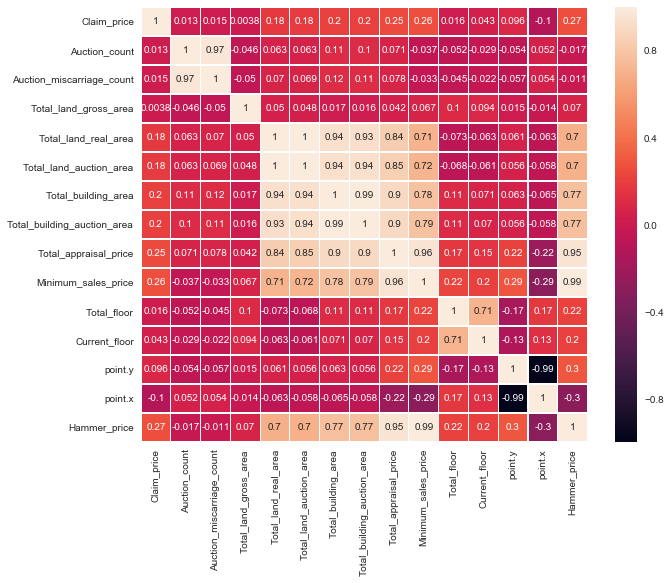

In [14]:
sns.heatmap(num_data[numerical_features].corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* 눈에 띄는 것은 면적과 가격 간에 연관도가 전체적으로 높게 나타나고 있습니다. 
* 경매 횟수와 유찰 횟수, 층 관련 변수들은 결국 같은 이야기를 하고 있는 것으로 보입니다.
* 면적 변수는 총 4개이며 이들은 건물의 면적이라는 하나의 변수로 취급해도 될 것 같습니다.
* 타겟 변수인 낙찰가과 비교해서 면적, 총 감정가, 최저매각가격들 간의 관계가 재미있어 보입니다.


count    1.933000e+03
mean     4.726901e+08
std      5.574493e+08
min      6.303000e+06
25%      1.975550e+08
50%      3.544500e+08
75%      5.599000e+08
max      1.515100e+10
Name: Hammer_price, dtype: float64


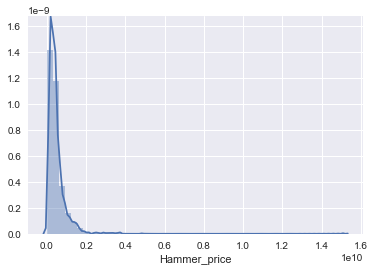

In [15]:
print(num_data['Hammer_price'].describe())
sns.distplot(num_data['Hammer_price'])

In [1]:
sns.boxplot(x=num_data['Hammer_price'])


NameError: name 'sns' is not defined

* 타겟 변수를 살펴보면 대부분 20억 까지 분포하고 있고, 150억이 넘는 경우도 보입니다.
* 적절하다는 확신이 들지 않지만 이대로는 어떤 그래프를 그려도 잘 보일 것 같지 않습니다.
* z값을 활용하여 outlier를 제거하겠습니다. 본 과제에서는 3시그마를 한계치로 두었습니다.

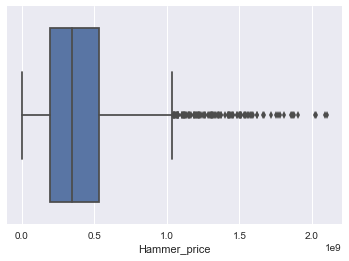

In [17]:
from scipy import stats

z = np.abs(stats.zscore(num_data))
num_data_2 = num_data[(z < 3).all(axis=1)]
sns.boxplot(x=num_data_2['Hammer_price'])

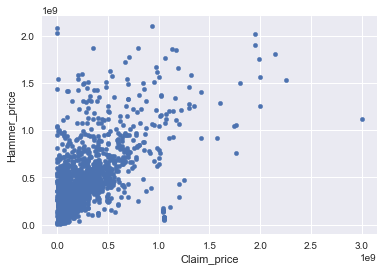

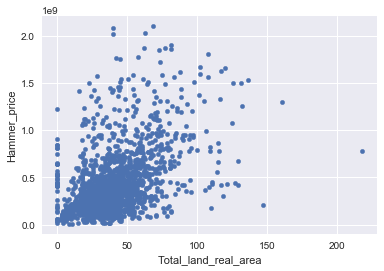

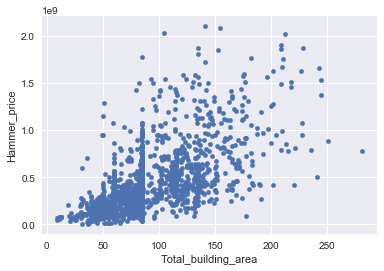

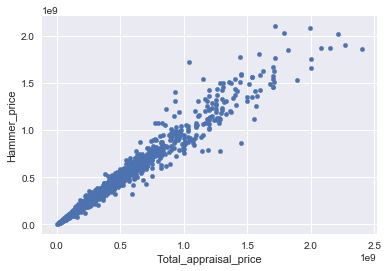

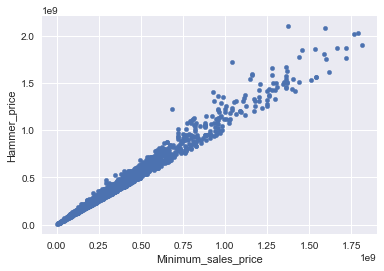

In [18]:
X = ['Claim_price','Total_land_real_area','Total_building_area','Total_appraisal_price','Minimum_sales_price']
Y = 'Hammer_price'
for i in X:
    data_1 = pd.concat([num_data_2[i],num_data_2[Y]], axis=1)
    data_1.plot.scatter(x=i, y=Y)

* 5개의 변수를 골라 그래프를 그려보았습니다. 연관도가 높을 수록 선형관계가 뚜렷이 보이고 있습니다. 

In [21]:
from sklearn import preprocessing 
label_enc = preprocessing.LabelEncoder() 
dummy_2 = dummy.apply(label_enc.fit_transform)
new_df = pd.concat([num_data,dummy_2], axis=1)
new_df = new_df[(z < 3).all(axis=1)]
new_df.head()

,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,...,addr_li_모전리,addr_li_삼성리,addr_li_서부리,addr_li_용수리,addr_san_N,addr_san_Y,Apartment_usage_아파트,Apartment_usage_주상복합,Share_auction_YorN_N,Share_auction_YorN_Y
0,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,...,0,0,0,0,1,0,0,1,1,0
2,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,...,0,0,0,0,1,0,1,0,1,0
3,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,...,0,0,0,0,1,0,1,0,1,0
4,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,...,0,0,0,0,1,0,1,0,1,0
5,105437195,2,1,8635.0,41.39,41.39,84.46,84.46,222000000,177600000,...,0,0,0,0,1,0,1,0,1,0


* 범주형 변수도 사용하기 위해 data를 sklearn의 label encoder클래스를 사용하여 바꿔주고 기존의 df에 붙였습니다.

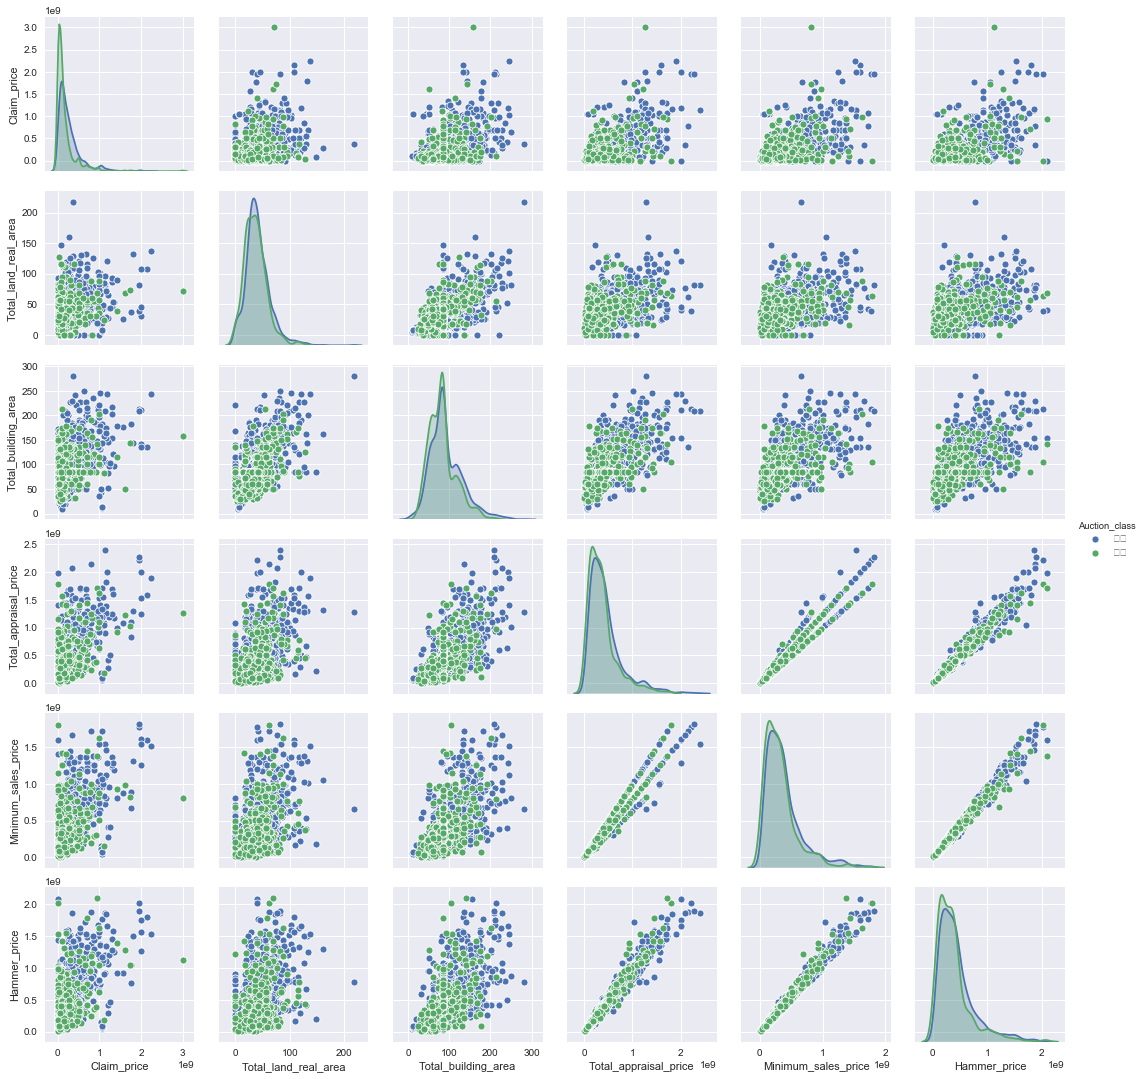

In [29]:
pair_df = pd.concat([num_data,obj_data['Auction_class']], axis=1)
pair_df = pair_df[(z < 3).all(axis=1)]
cols = ['Claim_price','Total_land_real_area','Total_building_area','Total_appraisal_price','Minimum_sales_price','Hammer_price','Auction_class']
sns.pairplot(pair_df[cols], hue="Auction_class")
plt.show()

* pairplot으로 모든 변수 간의 연관분석을 할 수 있습니다.
* 경매 청구 금액과 달리 낙찰가는 감정가와 최저매각가격과 비슷하게 책정되고 있습니다. 
* 경매구분으로써 색깔이 나타내는 의미는 파란색: 임의, 초록색: 강제
* 경매청구금액에서 임의의 경우 일반적으로 2배 높게 청구되었습니다.


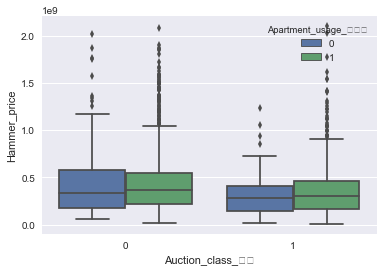

In [30]:
sns.boxplot(x='Auction_class_강제', y="Hammer_price", hue="Apartment_usage_아파트", data=new_df)
plt.show()

* x축: 0이면 임의, 1이면 강제
* y축: 낙찰가
* 파란색: 아파트
* 초록색: 주상복합 
* 임의경매 시 전체적으로 강제경매보다 낙찰가가 높고, 두 경우 모두 주상복합일 경우 중앙값이 높습니다.
* 주상복합의 경우 outlier가 더 많이 나타나고 있습니다.

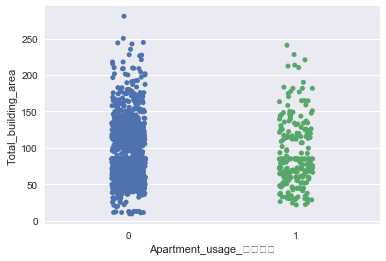

In [50]:
sns.stripplot(x="Apartment_usage_주상복합", y="Total_building_area", data=new_df, jitter=True)
plt.show()

* 파란색: 아파트 , 초록색:주상복합
* 경매 중 아파트의 비율이 더 많습니다. 면적은 최소값이 아파트에 있지만 최대 면적 또한 아파트에 있습니다.


### Ref
* Seaborn을 사용한 데이터 분포 시각화 https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
* Python을 이용한 보다 심도있는 EDA 진행하기 https://www.kaggle.com/coffeedjimmy/python-eda
* 데이터프레임 고급 인덱싱 https://datascienceschool.net/view-notebook/704731b41f794b8ea00768f5b0904512/#%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84-%EA%B3%A0%EA%B8%89-%EC%9D%B8%EB%8D%B1%EC%8B%B1
* How To Filter Pandas Dataframe By Values of Column? https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

